In [112]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Arc, Path, PathPatch
import numpy as np
from math import cos, sin, pi, radians, copysign
import itertools
from shapely.geometry import Polygon as Polygon_shapely
from shapely.geometry.point import Point as Point_shapely
from functools import reduce

1.	Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки `matplotlib`, см. пример: [ссылка](https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py)).

<font color="Crimson">**обязательная часть**

In [113]:
x = np.array([[[1, 2, 3], [4, 5, 6]]])
x.reshape(x.shape[1:] if len(x.shape) >= 3 else x.shape)

array([[1, 2, 3],
       [4, 5, 6]])

In [114]:
def plot_poligons(poligons: list):
    xmin, xmax, ymin, ymax = 1e10, -1e10, 1e10, -1e10
    if len(poligons[0]) == 2:
        poligons = [poligons] * 2

    t = []
    for poligon in poligons:
        poligon = np.array(poligon)
        poligon.reshape(poligon.shape[1:] if len(poligon.shape) >= 3 else poligon.shape)
        t.append(Polygon_shapely(poligon).bounds)

    xmin, ymin = np.min(t, axis=0)[:2]
    xmax, ymax = np.max(t, axis=0)[2:]
        
    plt.figure(figsize=(12, 5))
    plt.xlim(xmin - 3, xmax + 3)
    plt.ylim(ymin - 3, ymax + 3)

    ax = plt.gca()

    for poligon in poligons:
        if len(poligon) == 1:
            poligon = poligon[0]
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)
    
    plt.show()

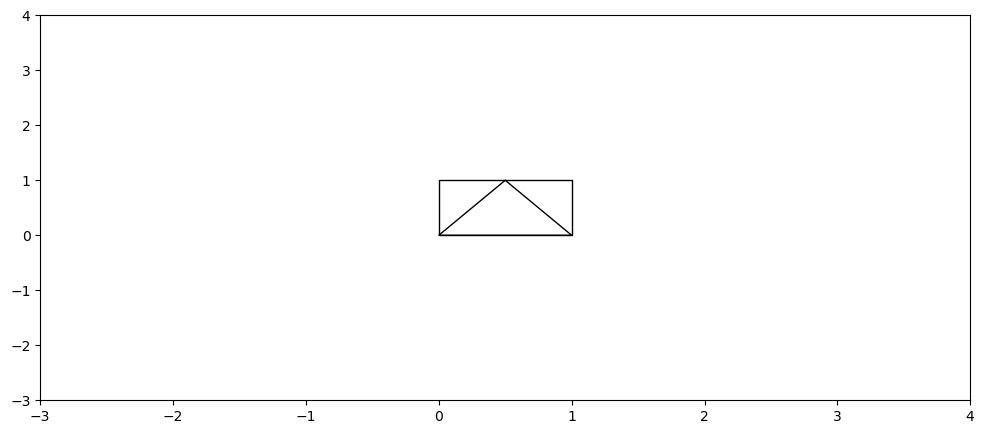

In [115]:
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]
poligon_2 = [(0, 0), (0.5, 1), (1, 0)]

poligons = [poligon_1, poligon_2]

plot_poligons(poligons)

2.	Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

* прямоугольников (`gen_rectangle`);

* треугольников (`gen_triangle`);

* правильных шестиугольников (`gen_hexagon`).

* с помощью данных функций используя функции из модуля `itertools` сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

<font color="Crimson">**обязательная часть**


In [116]:
def get_rectangle(rectangle: list, spacing: float = 1., n_figures: int = 10, plot: bool = True):
    rectangle_length , _ = abs(np.array(rectangle[2]) - np.array(rectangle[0]))
        
    x_space = (rectangle_length + 2 * spacing) * n_figures
    x_min = rectangle[0][0] - (x_space + rectangle_length)
    x_max = rectangle[0][0] + (x_space + rectangle_length)

    poligons = []
    rectangle = np.array(rectangle)
    for n in range(-n_figures, n_figures + 1):
        new_poligon = rectangle.copy()
        new_poligon[:, 0] = new_poligon[:, 0] + (rectangle_length + spacing) * n

        poligons.append(new_poligon)

    if not plot:
        return poligons

    plt.figure(figsize=(12, 5))
    plt.xlim(x_min, x_max)
    plt.ylim(rectangle[0][1] - 3, rectangle[2][1] + 3)

    ax = plt.gca()

    for poligon in poligons:
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)
    
    plt.show()

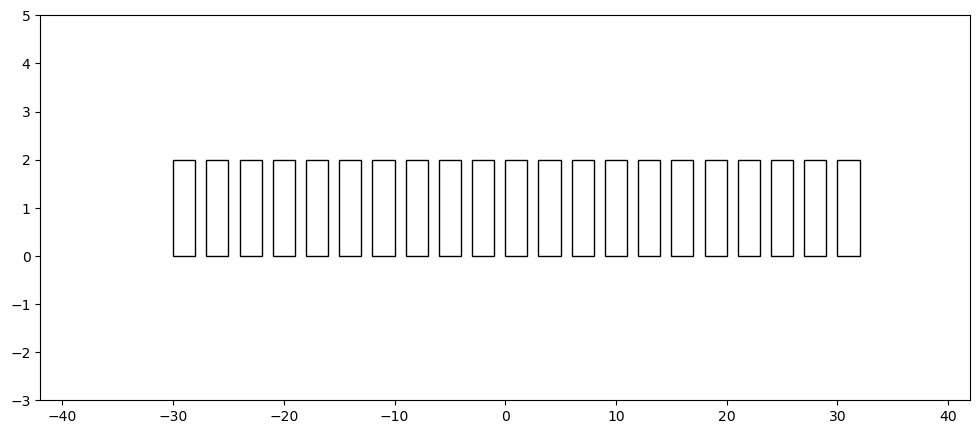

In [117]:
get_rectangle([(0, 0), (0, 2), (2, 2), (2, 0)])

In [118]:
def get_triangle(triangle: list, spacing: float = 1., n_figures: int = 20, plot: bool = True):
    triangle_length = max(abs(triangle[1][0] - triangle[0][0]), abs(triangle[2][0] - triangle[0][0]))
    triangle_height = max(abs(triangle[1][1] - triangle[0][1]), abs(triangle[2][1] - triangle[0][1]))
        
    x_space = (triangle_length + 2 * spacing) * n_figures
    x_min = triangle[0][0] - (x_space + triangle_length)
    x_max = triangle[0][0] + (x_space + triangle_length)

    poligons = []
    triangle = np.array(triangle)
    for n in range(-n_figures, n_figures + 1):
        new_poligon = triangle.copy()
        new_poligon[:, 0] = new_poligon[:, 0] + (triangle_length + spacing) * n

        poligons.append(new_poligon)

    if not plot:
        return poligons

    plt.figure(figsize=(12, 5))
    plt.xlim(x_min, x_max)
    plt.ylim(triangle_height - 3, triangle_height + 3)

    ax = plt.gca()

    for poligon in poligons:
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)
    
    plt.show()

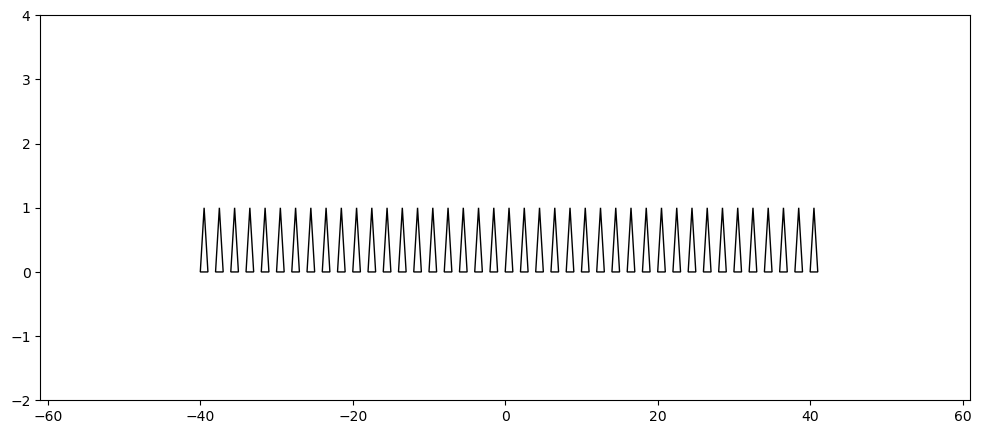

In [119]:
triangle = [(0, 0), (0.5, 1), (1, 0)]
get_triangle(triangle)

In [120]:
def get_hexagon(hexagon: list, spacing: float = 1., n_figures: int = 2):
    hexagon_length = (hexagon_sorted := sorted(hexagon))[-1][0] - hexagon_sorted[0][0]
        
    x_space = (hexagon_length + 2 * spacing) * n_figures
    x_min = triangle[0][0] - (x_space + hexagon_length)
    x_max = triangle[0][0] + (x_space + hexagon_length)

    plt.figure(figsize=(12, 5))
    plt.xlim(x_min, x_max)
    plt.ylim((hexagon_sorted := sorted(hexagon, key=lambda x: x[1]))[0][1] - 3, hexagon_sorted[-1][1] + 3)

    poligons = []
    hexagon = np.array(hexagon)
    for n in range(-n_figures, n_figures + 1):
        new_poligon = hexagon.copy()
        new_poligon[:, 0] = new_poligon[:, 0] + (hexagon_length + spacing) * n

        poligons.append(new_poligon)

    ax = plt.gca()

    for poligon in poligons:
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)
    
    plt.show()

In [121]:
hexagon = []
R = 2
x0, y0 = 0, 0

for i in range(6):
    hexagon.append((x0 + R * cos(2 * pi * i / 6), y0 + R * sin(2 * pi * i / 6)))

hexagon

[(2.0, 0.0),
 (1.0000000000000002, 1.7320508075688772),
 (-0.9999999999999996, 1.7320508075688774),
 (-2.0, 2.4492935982947064e-16),
 (-1.0000000000000009, -1.7320508075688767),
 (1.0000000000000002, -1.7320508075688772)]

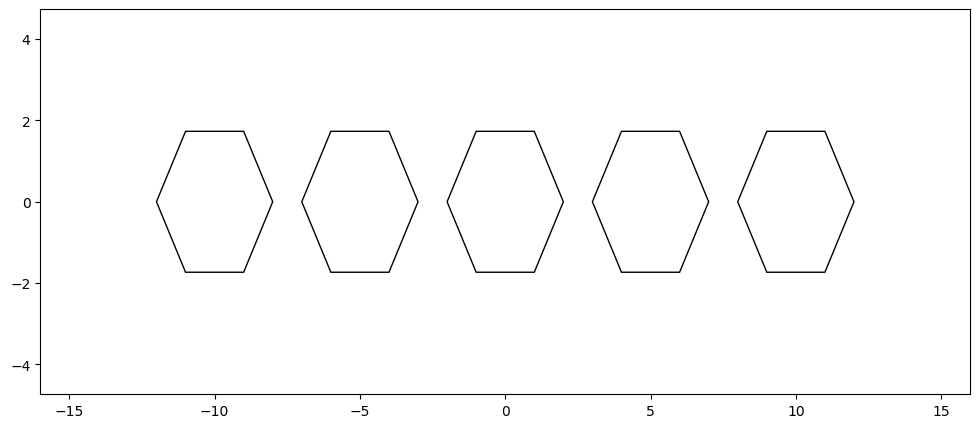

In [122]:
get_hexagon(hexagon)

In [123]:
def get_polygon_coords(n: int, R: float = 2., x0: float = 0, y0: float = 0,):
    polygon = []

    for i in range(n):
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    
    return polygon

def get_polygons(R: float = 2., spacing: float = 1., n_figures: int = 2):        
    x_space = (2 * R + 2 * spacing) * n_figures
    x_min = R - 2
    x_max = 2 * R + (x_space + 2 * R)

    plt.figure(figsize=(12, 5))
    plt.xlim(x_min, x_max)
    plt.ylim(-R - 1, R + 1)

    poligons = []
    for n in range(3, n_figures + 1):
        polygon = np.array(get_polygon_coords(n, R))
        polygon[:, 0] = polygon[:, 0] + (2 * R + spacing) * n

        poligons.append(polygon)

    ax = plt.gca()

    for poligon in poligons:
        p = Polygon(poligon, fill=False)
        ax.add_patch(p)
    
    plt.show()

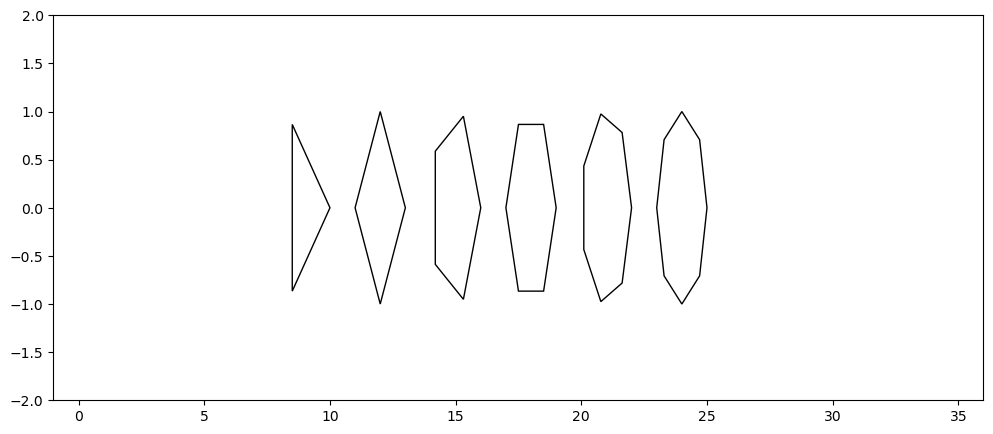

In [124]:
get_polygons(R=1, n_figures=8)

3.	Реализовать операции:

* параллельный перенос (`tr_translate`);

* поворот (`tr_rotate`);

* симметрия (`tr_symmetry`);

* гомотетия (`tr_homothety`);

которые можно применить к последовательности полигонов с помощью функции `map`.

<font color="Crimson">**обязательная часть**


In [125]:
def tr_translate(coord, alpha: float = 2.):
    return np.array(coord) + alpha

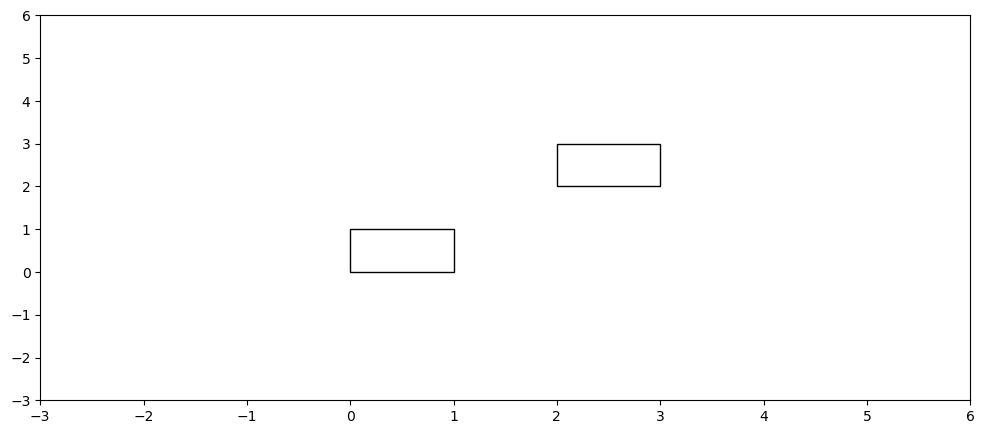

In [126]:
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]
poligon_2 = list(map(tr_translate, poligon_1))

poligons = [poligon_1, poligon_2]

plot_poligons(poligons)

In [127]:
def tr_rotate(coord, alpha: float = 45.):
    coord_complex = complex(*coord)
    new_coords = coord_complex * complex(cos(radians(alpha)), sin(radians(alpha)))

    return (new_coords.real, new_coords.imag)

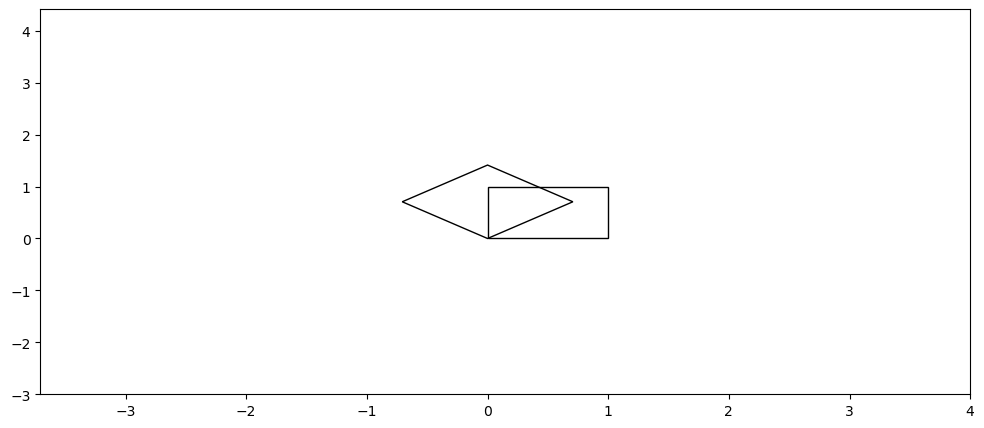

In [128]:
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]
poligon_2 = list(map(tr_rotate, poligon_1))

poligons = [poligon_1, poligon_2]

plot_poligons(poligons)

In [129]:
def tr_symmetry(coord):
    return -np.array(coord)

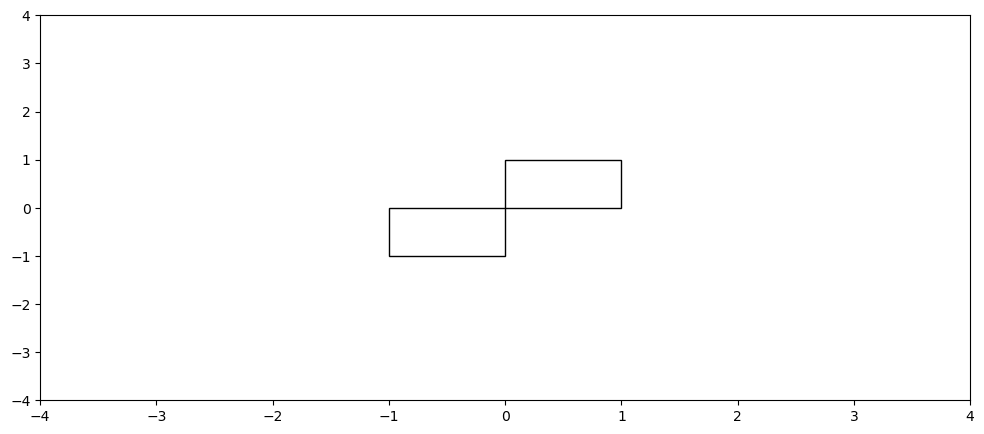

In [130]:
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]
poligon_2 = list(map(tr_symmetry, poligon_1))

poligons = [poligon_1, poligon_2]

plot_poligons(poligons)

In [131]:
def tr_homotety(coord, alpha: float = 2.):
    return np.array(coord) * alpha

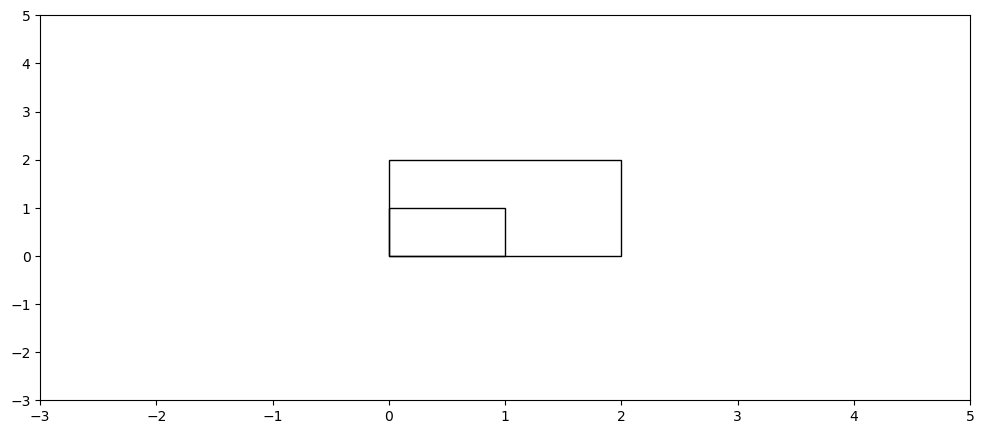

In [132]:
poligon_1 = [(0, 0), (0, 1), (1, 1), (1, 0)]
poligon_2 = list(map(tr_homotety, poligon_1))

poligons = [poligon_1, poligon_2]

plot_poligons(poligons)

4.	С помощью данных функций создать и визуализировать (рис. 3):

* три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

* две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

* две параллельных ленты треугольников, ориентированных симметрично друг к другу;

* последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

<font color="Crimson">**обязательная часть**

In [133]:
def tr_translate_ax(array, alpha: float = 3.):
    array = np.array(array)
    array[:, 1] = array[:, 1] + alpha
    return array

In [134]:
def tr_rotate_arr(array):
    return list(map(tr_rotate, array))

In [135]:
rect = [(0, 0), (0, 2), (2, 2), (2, 0)]
rect_arr0 = get_rectangle(rect, plot=False)
rect_arr1 = list(map(tr_translate_ax, rect_arr0))
rect_arr2 = list(map(tr_translate_ax, rect_arr1))

rect_arr = rect_arr0 + rect_arr1 + rect_arr2

rot_rect_arr = list(map(tr_rotate_arr, rect_arr))

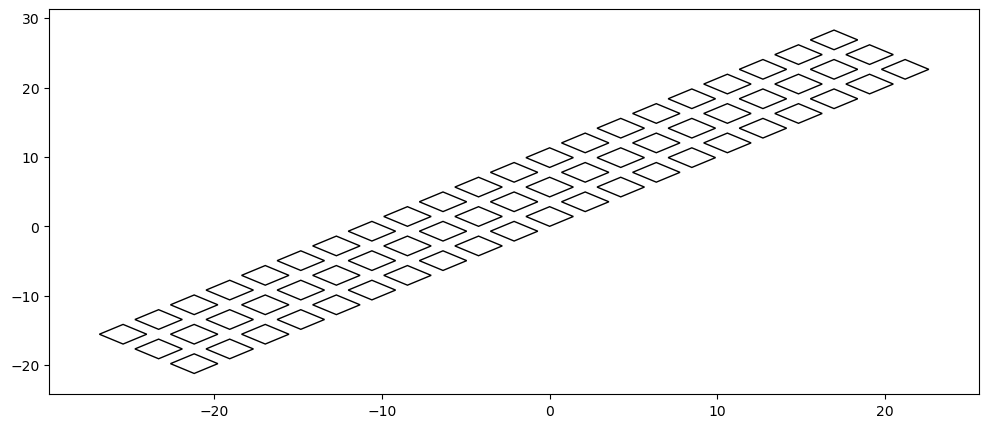

In [136]:
plot_poligons(rot_rect_arr)

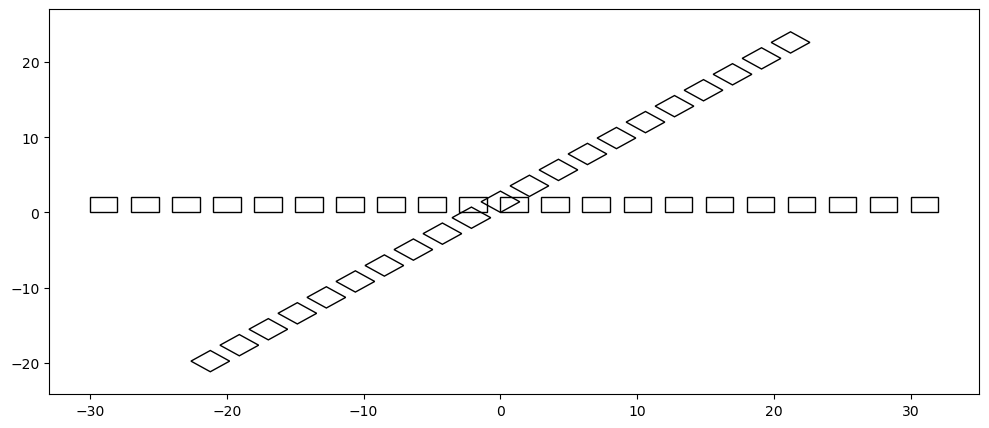

In [137]:
rect = [(0, 0), (0, 2), (2, 2), (2, 0)]
rect_arr0 = get_rectangle(rect, plot=False)

rot_rect_arr0 = list(map(tr_rotate_arr, rect_arr0))

rect_arr = rect_arr0 + rot_rect_arr0
plot_poligons(rect_arr)

In [138]:
def tr_symmetry_y(arr):
    arr = np.array(arr)
    arr[:, 1] = -arr[:, 1]
    return arr

In [139]:
triangle = [(0, 0), (0.5, 1), (1, 0)]
triangles = get_triangle(triangle, plot=False)

triangles_sym = list(map(tr_symmetry_y, triangles))
triangles_sym = list(map(tr_translate_ax, triangles_sym))

arrs = triangles + triangles_sym

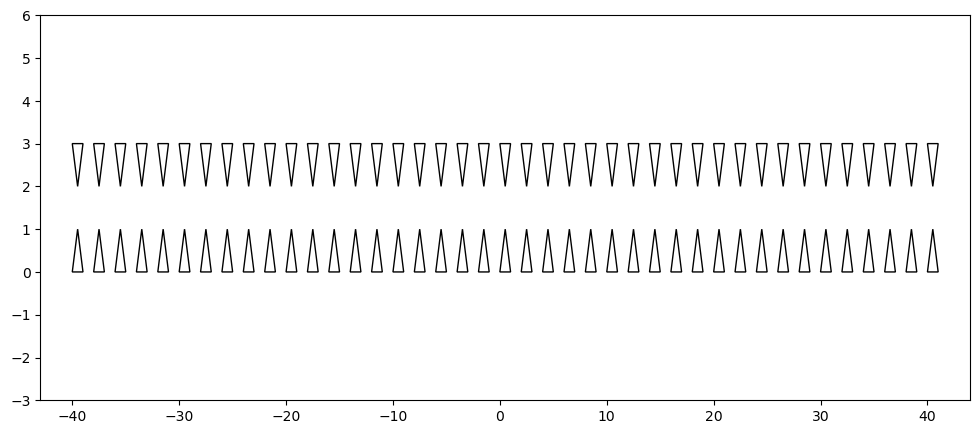

In [140]:
plot_poligons(arrs)

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

<font color="Crimson">**обязательная часть: 2 пункта<br>4 пункта — сложность 1<br>6 пунктов — сложность 2**


In [141]:
def tr_rotate(coord, alpha: float = 135.):
    coord_complex = complex(*coord)
    new_coords = coord_complex * complex(cos(radians(alpha)), sin(radians(alpha)))

    return (new_coords.real, new_coords.imag)

In [142]:
def tr_homotety_arr(arr, alpha: float = 2.):
    coord = []
    for c in arr:
        coord.append(tr_homotety(c, alpha).tolist())
    return coord

In [143]:
def calc_sides(arr):
    arr = np.array(arr)

    short = np.linalg.norm(arr[2] - arr[1])
    long = np.linalg.norm(arr[0] - arr[3])

    return short, long

In [144]:
def is_convex(polygon):
    def vektorn_proizv_sign(p1, p2, p3):
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        return (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

    signs = []
    for i in range(len(polygon)):
        signs.append(copysign(1, vektorn_proizv_sign(polygon[i], polygon[(i + 1) % len(polygon)], polygon[(i + 2) % len(polygon)])))

    return all(s == signs[0] for s in signs)

def flt_convex_polygon(polygons):
    return list(filter(is_convex, polygons))

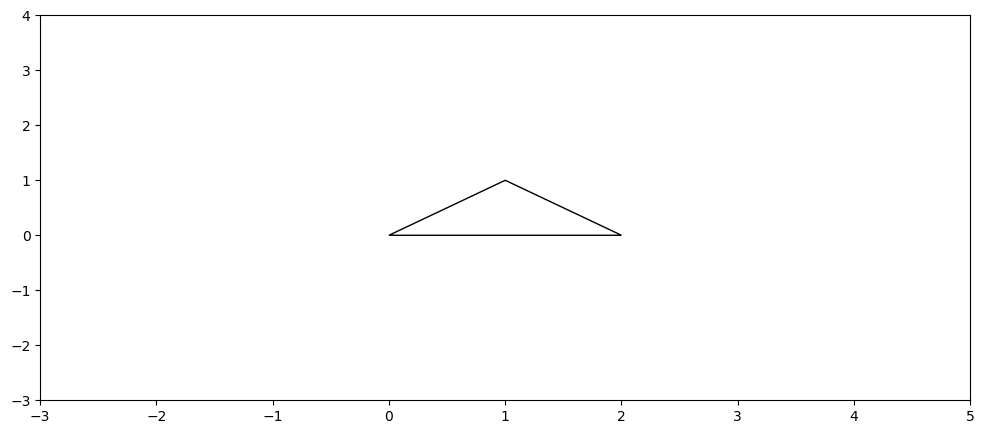

In [145]:
polygons = [[(0, 0), (-1, 0), (0.5, 0.5), (0, 1)], [(0, 0), (2, 0), (1, 1)]]

convex_polygons = flt_convex_polygon(polygons)
plot_poligons(convex_polygons)

In [146]:
def flt_angle_point(polygons, point):
    return filter(lambda p: point in p, polygons)

Многоугольники с углом в заданной тояке:
[[(0, 0), (3, 0), (3, 2), (0, 2)]]


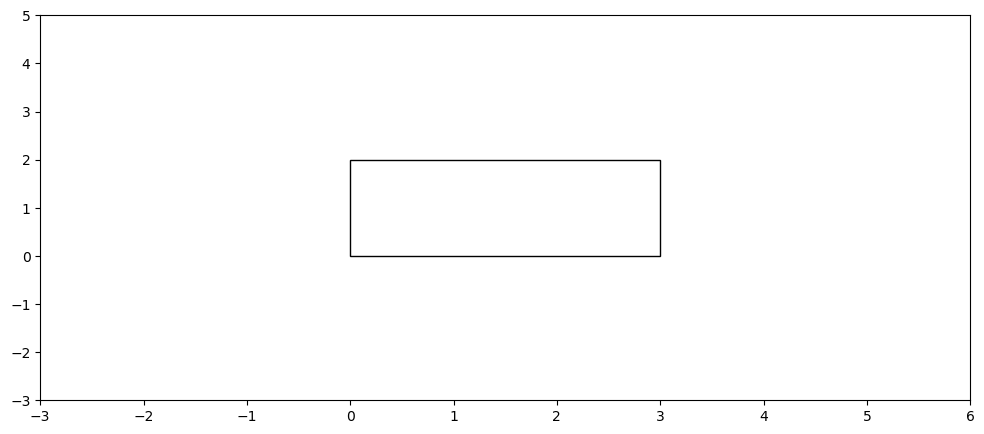

In [147]:
rectangles = [(0, 0), (3, 0), (3, 2), (0, 2)]
triangles = [(4, 0), (6, 2), (5, 3)]


filtered = list(flt_angle_point([rectangles, triangles], (0, 0)))
print("Многоугольники с углом в заданной тояке:")
print(filtered)
plot_poligons(filtered)

In [148]:
def polygon_area(polygon):
    return 0.5 * abs(sum(x0 * y1 - x1 * y0 for (x0, y0), (x1, y1) in zip(polygon, polygon[1:] + polygon[:1])))

def flt_square(polygons, min_area):
    return filter(lambda p: polygon_area(p) >= min_area, polygons)

In [149]:
polygons = [[(0, 0), (3, 0), (3, 3), (0, 3)], [(0, 0), (2, 0), (1, 1)], [(0, 0), (2, 0), (1, 1)]]

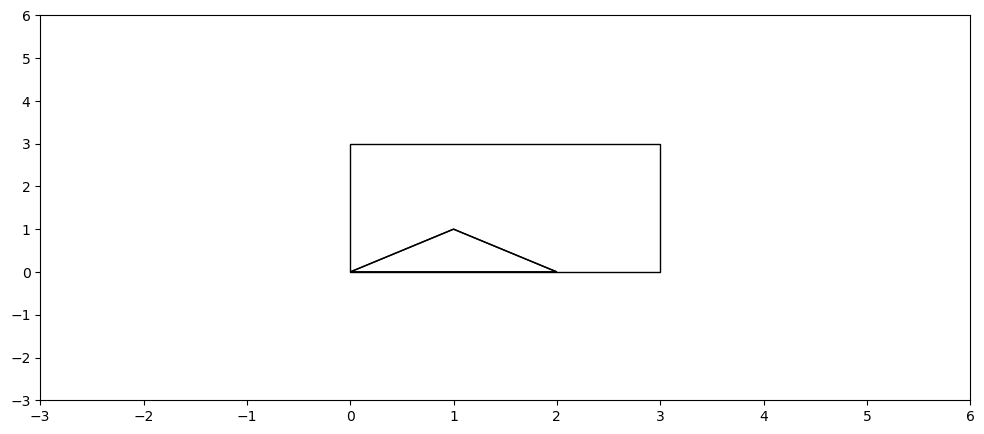

In [150]:
# polygons = list(filter(flt_square, polygons))
large_hexagons = list(flt_square(itertools.islice(polygons, 3), 0))
plot_poligons(polygons)

In [151]:
def polygon_shortest_side(polygon):
    distances = [np.linalg.norm(np.array(a) - np.array(b)) for a, b in zip(polygon, polygon[1:])]
    return min(distances)

def flt_short_side(polygons, min_length):
    return filter(lambda p: polygon_shortest_side(p) >= min_length, polygons)

In [152]:
def flt_point(polygons, point):
    return filter(lambda p: Polygon_shapely(p).contains(Point_shapely(point)), polygons)

In [153]:

flt_point

<function __main__.flt_point(polygons, point)>

7.	Реализовать декораторы и продемонстрировать корректность их работы:

* фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 5: `@flt_convex_polygon`, `@flt_angle_point`, `@flt_square`, `@flt_short_side`, `@flt_point_inside`, `@flt_polygon_angles_inside`;

* преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: `@tr_translate`, `@tr_rotate`, `@tr_symmetry`, `@tr_homothety`.

<font color="Crimson">**обязательная часть: 1 пункт<br>5 пунктов — сложность 1**

In [154]:
def tr_translate_wr(func):
    def wrapper(*args, **kwargs):
        polygon = func(*args, **kwargs)
        return tr_translate(polygon, 5)

    return wrapper

In [155]:
@tr_translate_wr
def get_polygon_coords_with_wr(n: int, R: float = 2., x0: float = 0, y0: float = 0,):
    polygon = []

    for i in range(n):
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    
    return polygon

In [156]:
polygon_trans = get_polygon_coords_with_wr(3)
polygon_norms = get_polygon_coords(3)

polygons = [polygon_trans, polygon_norms]
polygons

[array([[7.        , 5.        ],
        [4.        , 6.73205081],
        [4.        , 3.26794919]]),
 [(2.0, 0.0),
  (-0.9999999999999996, 1.7320508075688774),
  (-1.0000000000000009, -1.7320508075688767)]]

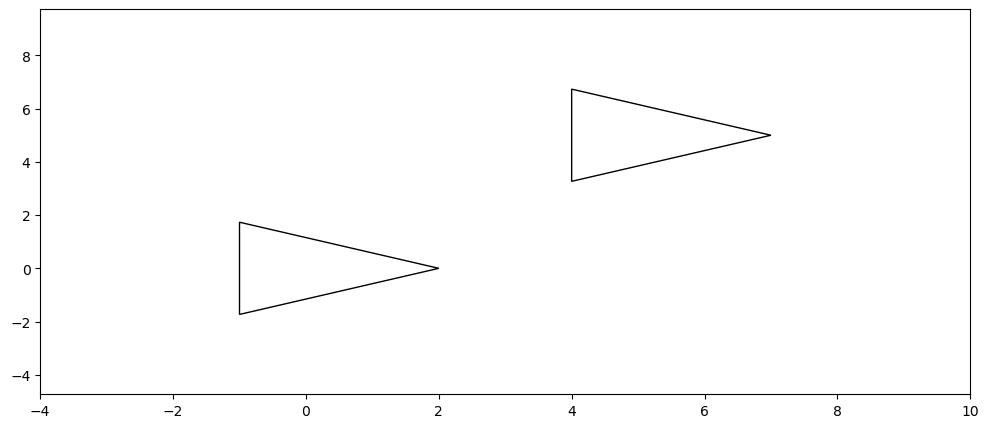

In [157]:
plot_poligons(polygons)

In [158]:
import functools

def flt_point_inside(point_x=0, point_y=0):
    point = Point_shapely(point_x, point_y)
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            results = func(*args, **kwargs)
            return list(flt_point(results, point))
        return wrapper
    return decorator

In [159]:
@flt_point_inside(point_x=0, point_y=0)
def get_polygons_point_wr(n: int=5, R: float = 2., x0: float = 0, y0: float = 0,):
    polygon = []

    for i in range(n):
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    
    return [polygon]

In [160]:
get_polygons_point_wr()

[[(2.0, 0.0),
  (0.6180339887498949, 1.902113032590307),
  (-1.6180339887498947, 1.1755705045849465),
  (-1.6180339887498951, -1.175570504584946),
  (0.6180339887498945, -1.9021130325903073)]]

In [161]:
def tr_rotate_wr(func):
    def wrapper(*args, **kwargs):
        polygon = func(*args, **kwargs)
        return list(map(tr_rotate, polygon))

    return wrapper

In [162]:
@tr_rotate_wr
def get_polygon_coords_with_wr(n: int, R: float = 2., x0: float = 0, y0: float = 0,):
    polygon = []

    for i in range(n):
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    
    return polygon

In [163]:
polygon_trans = get_polygon_coords_with_wr(3)
polygon_norms = get_polygon_coords(3)

polygons = [polygon_trans, polygon_norms]
polygons

[[(-1.414213562373095, 1.4142135623730951),
  (-0.517638090205042, -1.9318516525781362),
  (1.9318516525781368, 0.5176380902050403)],
 [(2.0, 0.0),
  (-0.9999999999999996, 1.7320508075688774),
  (-1.0000000000000009, -1.7320508075688767)]]

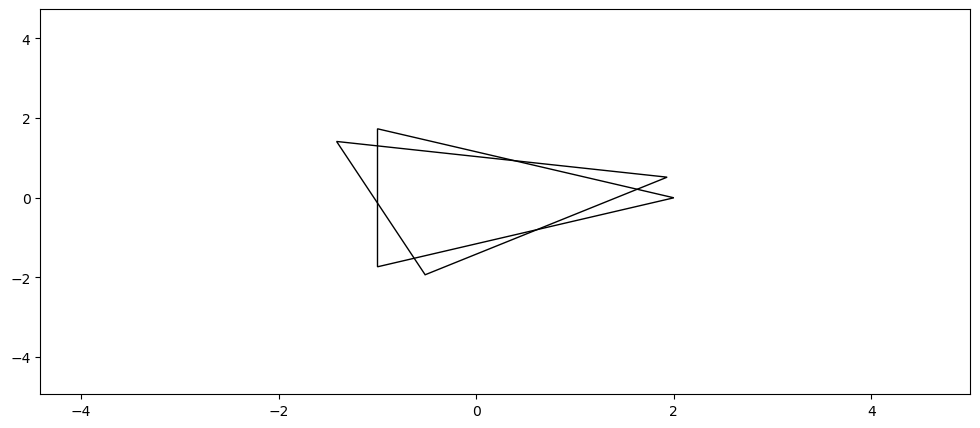

In [164]:
plot_poligons(polygons)

In [165]:
def tr_homothety_wr(func):
    def wrapper(*args, **kwargs):
        polygon = func(*args, **kwargs)
        return list(map(tr_homotety, polygon))

    return wrapper

In [166]:
@tr_homothety_wr
def get_polygon_coords_with_wr(n: int, R: float = 2., x0: float = 0, y0: float = 0,):
    polygon = []

    for i in range(n):
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    
    return polygon

In [167]:
polygon_trans = get_polygon_coords_with_wr(3)
polygon_norms = get_polygon_coords(3)

polygons = [polygon_trans, polygon_norms]
polygons

[[array([4., 0.]),
  array([-2.        ,  3.46410162]),
  array([-2.        , -3.46410162])],
 [(2.0, 0.0),
  (-0.9999999999999996, 1.7320508075688774),
  (-1.0000000000000009, -1.7320508075688767)]]

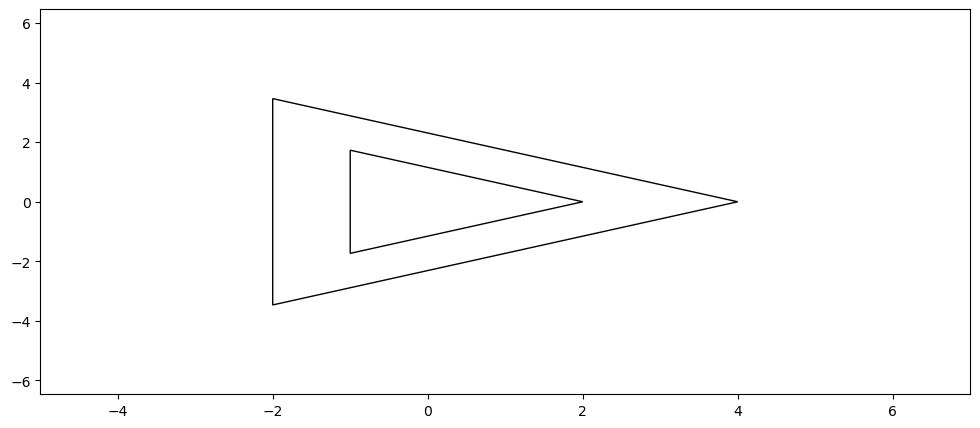

In [168]:
plot_poligons(polygons)

In [169]:
def tr_symmetry_wr(func):
    def wrapper(*args, **kwargs):
        polygon = func(*args, **kwargs)
        return list(map(tr_symmetry, polygon))

    return wrapper

In [170]:
@tr_symmetry_wr
def get_polygon_coords_with_wr(n: int, R: float = 2., x0: float = 0, y0: float = 0,):
    polygon = []

    for i in range(n):
        polygon.append((x0 + R * cos(2 * pi * i / n), y0 + R * sin(2 * pi * i / n)))
    
    return polygon

In [171]:
polygon_trans = get_polygon_coords_with_wr(3)
polygon_norms = get_polygon_coords(3)

polygons = [polygon_trans, polygon_norms]
polygons

[[array([-2., -0.]),
  array([ 1.        , -1.73205081]),
  array([1.        , 1.73205081])],
 [(2.0, 0.0),
  (-0.9999999999999996, 1.7320508075688774),
  (-1.0000000000000009, -1.7320508075688767)]]

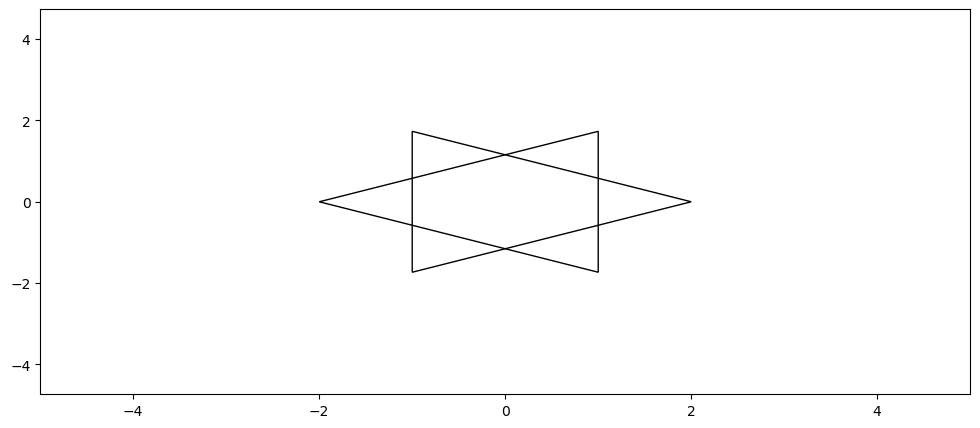

In [172]:
plot_poligons(polygons)

8. Реализовать функции и продемонстрировать их корректность:

* поиск угла, самого близкого к началу координат (`agr_origin_nearest`);

* поиск самого длинной стороны многоугольника (`agr_max_side`);

* поиск самой маленькой площади многоугольника (`agr_min_area`);

* расчет суммарного периметра (`agr_perimeter`);

* расчет суммарной площади (`agr_area`);

которые можно применить к последовательности полигонов с помощью функции `functools.reduce`.

<font color="Crimson">**3 пункта — сложность 1<br>5 пунктов — сложность 2**


In [173]:
def calc_area(polygon):
    return Polygon_shapely(polygon).area

def reduce_area(prev_polygon, next_polygon):
    return calc_area(prev_polygon) + calc_area(next_polygon)

In [174]:
polygons = [[(0, 0), (1, 0), (0.5, 0.5), (0, 1)], [(0, 0), (2, 0), (1, 1)]]
reduce(reduce_area, polygons)

1.5

In [175]:
def calc_perimetr(polygon):
    return Polygon_shapely(polygon).perimetr

def reduce_perimetr(prev_polygon, next_polygon):
    return calc_perimetr(prev_polygon) + calc_perimetr(next_polygon)

In [176]:
polygons = [[(0, 0), (3, 0), (0.5, 0.5), (0, 1)], [(0, 0), (2, 0), (1, 1)]]
reduce(reduce_perimetr, polygons)

2.0

In [177]:
def reduce_min_area(prev_polygon, next_polygon):
    return min(calc_area(prev_polygon), calc_area(next_polygon))

In [178]:
polygons = [[(0, 0), (3, 0), (0.5, 0.5), (0, 1)], [(0, 0), (2, 0), (1, 1)]]
reduce(reduce_min_area, polygons)

1.0

In [179]:
def reduce_max_area(prev_polygon, next_polygon):
    return max(calc_area(prev_polygon), calc_area(next_polygon))

In [180]:
polygons = [[(0, 0), (3, 0), (0.5, 0.5), (0, 1)], [(0, 0), (100, 0), (1, 1)]]
reduce(reduce_max_area, polygons)

50.0